# **Micro Credit Defaulter Project**

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
# import data
data = pd.read_csv('/content/Data file.csv')
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
data.shape

(209593, 37)

In [6]:
data.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [7]:
data.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [8]:
data.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


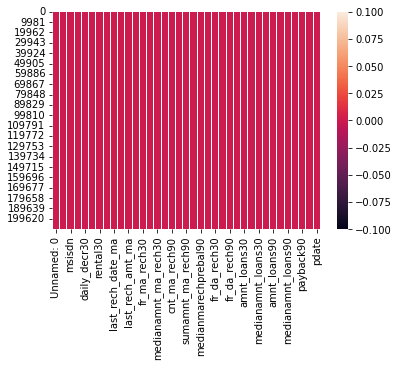

In [9]:
# let's see the graphical visualization for null values
#plt.figure(figsize = (18,15))
sns.heatmap(data.isnull())
plt.show()

 - Hence, it shows there is no null values.

In [10]:
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [11]:
# drop column Unnamed
data.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
data.shape

(209593, 36)

In [13]:
# storing object type column in separate dataframe
objecttypes = data.select_dtypes(include=['object'])
objecttypes

,msisdn,pcircle,pdate
0,21408I70789,UPW,2016-07-20
1,76462I70374,UPW,2016-08-10
2,17943I70372,UPW,2016-08-19
3,55773I70781,UPW,2016-06-06
4,03813I82730,UPW,2016-06-22
...,...,...,...
209588,22758I85348,UPW,2016-06-17
209589,95583I84455,UPW,2016-06-12
209590,28556I85350,UPW,2016-07-29
209591,59712I82733,UPW,2016-07-25


 - msisdn has numeric entries so we'll convert into integer type
 - pcircle has only 1 telecom provider name, we'll delete it.
 - we'll convert pdate into year,month and date.

In [14]:
for column in objecttypes.columns :
  print('no of unique columns:',column,'::',objecttypes[column].nunique())
  print('column',objecttypes.value_counts())
  print('*******************************************************')

no of unique columns: msisdn :: 186243
column msisdn       pcircle  pdate     
61209I70783  UPW      2016-06-25    2
91378I90589  UPW      2016-06-19    2
82741I90849  UPW      2016-07-23    2
67402I84459  UPW      2016-06-20    2
13778I82730  UPW      2016-06-12    2
                                   ..
66597I85339  UPW      2016-08-15    1
                      2016-06-11    1
66596I90585  UPW      2016-07-12    1
66596I85339  UPW      2016-07-31    1
00004I82738  UPW      2016-06-06    1
Length: 209586, dtype: int64
*******************************************************
no of unique columns: pcircle :: 1
column msisdn       pcircle  pdate     
61209I70783  UPW      2016-06-25    2
91378I90589  UPW      2016-06-19    2
82741I90849  UPW      2016-07-23    2
67402I84459  UPW      2016-06-20    2
13778I82730  UPW      2016-06-12    2
                                   ..
66597I85339  UPW      2016-08-15    1
                      2016-06-11    1
66596I90585  UPW      2016-07-12    1
6

 - msisdn is mobile number of user which should be 10 digits but there is 'I' at every 6th digit so we'll remove it.
 - pcircle contains only one entry, better to drop it.
 - pdate is showing date and month seprately so we ll be adding this.

In [15]:
data.drop('pcircle',axis=1,inplace=True)

In [16]:
len(data['msisdn'][0])

11

In [17]:
data['msisdn'] = data['msisdn'].str.replace('I','')

In [18]:
data['msisdn']

0         2140870789
1         7646270374
2         1794370372
3         5577370781
4         0381382730
             ...    
209588    2275885348
209589    9558384455
209590    2855685350
209591    5971282733
209592    6506185339
Name: msisdn, Length: 209593, dtype: object

In [19]:
data['year'] = data['pdate'].str.split('-').str[0]
data['month'] = data['pdate'].str.split('-').str[1]
data['date'] = data['pdate'].str.split('-').str[2]

In [20]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,year,month,date
0,0,2140870789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,2016,07,20
1,1,7646270374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,2016,08,10
2,1,1794370372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,2016,08,19
3,1,5577370781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,2016,06,06
4,1,0381382730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,2016,06,22


In [21]:
data.shape

(209593, 38)

In [22]:
# we splitted pdate into year month date,so we'll drop pdate
data.drop('pdate',axis=1,inplace=True)

In [23]:
# checking unique values in year column
data['year'].nunique()

1

In [24]:
# only 1 entry so drop it
data.drop('year',axis=1,inplace=True)

In [25]:
data['month']

0         07
1         08
2         08
3         06
4         06
          ..
209588    06
209589    06
209590    07
209591    07
209592    07
Name: month, Length: 209593, dtype: object

In [26]:
data['month'].unique()

array(['07', '08', '06'], dtype=object)

In [27]:
data['month'].dtype

dtype('O')

In [28]:
data['month'] = data['month'].astype(int)
data['date'] = data['date'].astype(int)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [30]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.00000


Columns with negative minimum values.
 - aon
 - daily_decr30
 - rental30
 - rental90
 - last_rech_date_ma
 - last_rech_date_da
 aon=age on cellular network in days,which min value should be 0.

In [31]:
# check less than 0
data_aon = data[data['aon']<0]
data_aon

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
30,1,7013090843,-42.0,8.864333,8.864333,780.71,780.71,780195.497093,0.0,773,2,10.0,946.0,473.0,1.80,3,32,2666,773.0,0.30,0.0,0.0,0,0,1,6,6.0,1.0,1.000000,6,6,1.0,0.0,0.0,6,7
197,1,4685890841,-36.0,32.075333,32.075333,1557.53,1557.53,1.000000,0.0,1539,1,0.0,1539.0,1539.0,4.87,1,0,1539,1539.0,4.87,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,13
322,1,0302770379,-37.0,9.160000,9.160000,203.04,203.04,1.000000,0.0,770,2,16.0,943.0,471.5,12.30,2,16,943,471.5,12.30,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,12
504,1,7567084458,-36.0,11.470333,11.470333,40.04,40.04,1.000000,0.0,770,1,0.0,770.0,770.0,8.40,1,0,770,770.0,8.40,0.0,0.0,0,0,1,6,6.0,0.0,3565.786503,6,6,0.0,0.0,0.0,6,13
603,1,5849589235,-35.0,12.474000,12.474000,1823.08,1823.08,1.000000,0.0,1539,1,0.0,1539.0,1539.0,80.20,1,0,1539,1539.0,80.20,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208716,1,1016290589,-34.0,19.260000,19.260000,714.15,714.15,1.000000,0.0,773,1,0.0,773.0,773.0,4.50,1,0,773,773.0,4.50,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,15
209121,1,6551184450,-18.0,700.580000,700.600000,1057.72,1090.76,1.000000,0.0,770,1,0.0,770.0,770.0,25.00,1,0,770,770.0,25.00,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,7,1
209240,1,3489670375,-28.0,10.640000,10.640000,133.35,133.35,1.000000,0.0,770,1,0.0,770.0,770.0,54.00,1,0,770,770.0,54.00,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,21
209421,1,5171784459,-44.0,7.166667,7.166667,368.55,368.55,1.000000,0.0,773,1,0.0,773.0,773.0,29.00,1,0,773,773.0,29.00,0.0,0.0,0,0,1,6,6.0,0.0,1.000000,6,6,0.0,0.0,0.0,6,5


In [32]:
data['aon']

0          272.0
1          712.0
2          535.0
3          241.0
4          947.0
           ...  
209588     404.0
209589    1075.0
209590    1013.0
209591    1732.0
209592    1581.0
Name: aon, Length: 209593, dtype: float64

In [33]:
data_aon['label'].value_counts()

1    1047
0     492
Name: label, dtype: int64

In [34]:
# converting aon into +ve
data['aon'] = abs(data['aon'])

In [35]:
data['aon'].min()

1.0

 - column aon is positive now.

In [36]:
data

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
0,0,2140870789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,7646270374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,1794370372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,5577370781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,0381382730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,2275885348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209589,1,9558384455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6,12
209590,1,2855685350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29
209591,1,5971282733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


In [37]:
data['last_rech_date_ma'] = abs(data['last_rech_amt_ma'])
data['last_rech_date_da'] = abs(data['last_rech_date_da'])

In [38]:
data['last_rech_date_da'].min()

0.0

In [39]:
data['last_rech_amt_ma'].min()

0

In [40]:
# create a dataframe which has negative values in rental30
data_ren30 = data[data['rental30']<30]
data_ren30

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
24,0,5964582735,966.0,291.563333,291.563333,-2020.09,-2020.09,0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,6,23
41,1,8558070784,545.0,113.750000,113.750000,-110.75,-110.75,4048,0.0,4048,2,9.0,12048.0,6024.0,45.00,2,9,12048,6024.0,45.00,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,12.0,12.0,6,25
76,0,3068790848,621.0,600.000000,600.000000,0.00,0.00,0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,7,2
77,1,9838870377,383.0,1219.782000,1238.740000,-889.14,-919.80,3178,0.0,3178,1,0.0,3178.0,3178.0,0.50,1,0,3178,3178.0,0.50,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,7,1
78,0,2746090847,766.0,-0.250000,-0.250000,0.00,0.00,0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209512,0,6525370379,112.0,-0.500000,-0.500000,0.00,0.00,773,0.0,773,0,0.0,0.0,0.0,0.00,2,2,1546,773.0,277.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,6,15
209521,1,2517184457,281.0,1704.000000,1795.070000,0.00,180.00,3178,0.0,3178,0,0.0,0.0,0.0,0.00,2,1,6356,3178.0,616.50,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0,8,10
209536,1,9499370785,427.0,5887.000000,5942.360000,0.00,0.00,9400,64.0,9400,0,0.0,0.0,0.0,0.00,1,0,9400,9400.0,72.71,0.0,0.0,1,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,7,30
209538,1,9610789238,1299.0,5.600000,5.600000,20.28,20.28,773,0.0,773,1,0.0,773.0,773.0,48.24,1,0,773,773.0,48.24,0.0,0.0,0,0,1,6,6.0,1.0,1.0,6,6,1.0,0.0,0.0,6,3


Creating a 2 dataframe:<br>
1.The one who failed to repay the loan.<br>
2.Other people who did repay the loan.<br>
This 2 dataframes created with respect to negative values in rental30.

In [41]:
# dataframe who failed to pay the loan.
data_rainfail = data_ren30[data_ren30['label']==0]
data_rainfail[['label','rental90','amnt_loans90']]

,label,rental90,amnt_loans90
24,0,-2020.09,6
76,0,0.00,6
78,0,0.00,6
106,0,0.00,6
109,0,0.00,6
...,...,...,...
209409,0,0.00,6
209436,0,0.00,6
209439,0,10.00,6
209473,0,0.00,6


We can note that eventhough the average rental balance is in negatives[which means the customer owe rent to company],
they did repay their loans,which is most unlikely.

There might be other possibility that user will not be granted loan if they have negative balance.
This might be due to erroneous entry.So converting them to positive. 

In [42]:
data['rental30']=abs(data['rental30'])

In [43]:
# creating dataframe which has negative values
data_ren90 = data[data['rental90']<0]
data[['label','rental90','amnt_loans90']]

,label,rental90,amnt_loans90
0,0,260.13,12
1,1,3691.26,12
2,1,900.13,6
3,1,159.42,12
4,1,1098.90,42
...,...,...,...
209588,1,1089.19,12
209589,1,1728.36,18
209590,1,8893.20,54
209591,1,984.58,24


In [44]:
# dataframe who failed to pay loan with respect to average rental balance of 90 days
data_ren90fail = data_ren90[data_ren90['label']==0]
data_ren90fail[['label','rental90','amnt_loans90']]

,label,rental90,amnt_loans90
24,0,-2020.09,6
246,0,-229.77,6
1309,0,-83.02,12
1469,0,-163.90,24
1777,0,-121.21,6
...,...,...,...
207113,0,-278.64,6
207949,0,-3719.25,6
208543,0,-187.00,6
209175,0,-1126.16,6


In [45]:
# dataframe who fail to pay loan with respect to average rental balance of 90 days
data_rent90pass = data_ren90[data_ren90['label']==1]
data_rent90pass[['label','rental90','amnt_loans90']]

,label,rental90,amnt_loans90
41,1,-110.75,12
77,1,-919.80,6
116,1,-177.48,12
117,1,-40.20,12
125,1,-44.88,24
...,...,...,...
209304,1,-281.12,18
209332,1,-505.80,24
209441,1,-691.90,6
209466,1,-441.57,24


In [46]:
# covering rental 90 column to positive. As there are negatice values who had repaid their loans.
data['rental90'] = abs(data['rental90'])

In [47]:
data['maxamnt_loans30'].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
59275.166722         1
68599.755670         1
                 ...  
26462.333521         1
53666.885900         1
67319.013426         1
36610.121211         1
28708.879352         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

 - maxamnt_loans30 => this column has to be 6 or 12.<br>
 - we can notice that there are huge no.of entries other than 6,12. ignoring 0 because there might be users who hasnt taken loans.
 - Converting the other numbers to zero cz there is no probability of loan repay amount other than 6 ad 12
 - there are 1047 rows that has values other than 6,12 and0.

In [48]:
len(data['maxamnt_loans30'])

209593

In [49]:
# checking the values which has entries other than 6,12,0
data.loc[(data['maxamnt_loans30']!=6.0) & (data['maxamnt_loans30']!=12.0) & (data['maxamnt_loans30']!=0.0),'maxamnt_loans30']=0.0

In [50]:
data['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

In [51]:
# checking users who haven't taken any loan
data1 = pd.DataFrame(np.where(data['amnt_loans90']==0))

In [52]:
data1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042
0,127,149,187,212,262,431,441,475,488,570,590,963,965,978,983,1254,1263,1400,1592,1725,1844,1884,1972,2169,2219,2309,2497,2950,3230,3247,3333,3455,3494,3621,4026,4042,4110,4133,4228,4260,...,204796,205031,205172,205318,205498,205568,205815,205918,205964,206066,206119,206196,206207,206344,206370,206637,206754,206844,206957,207367,207390,207578,207582,207708,207718,207751,207787,207936,208016,208103,208137,208148,208231,208818,209213,209337,209343,209401,209406,209580


 - there are almmost 2043 rows in the main data frame where users have not taken any kind of loan.
 - Deleting those rows because they wont be of any use in prediction of loan repayment.


In [53]:
# deleting the info of users who havent taken any loan.
data.drop(data[data['amnt_loans90']==0].index, inplace = True)

In [54]:
np.where(data['amnt_loans90']==0)

(array([], dtype=int64),)

In [55]:
data.shape

(207550, 36)

In [56]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
count,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000
mean,0.873948,8095.625616,5352.424286,6044.967417,2697.321812,3477.845090,2057.044751,3719.710805,2057.044751,3.991477,3728.164201,7719.908547,1809.560378,3856.541717,6.324110,7.707916,12380.958497,1856.325770,91.041710,262.338024,3742.660507,0.041759,0.046162,2.786138,18.128730,6.689790,0.054560,18.610723,23.878150,6.769116,0.046531,3.421201,4.350039,6.787560,14.429159
std,0.331908,75605.518933,9208.694592,10902.815812,4258.460653,5698.968928,2363.829442,53428.256336,2363.829442,4.264318,53603.753070,10154.119795,2065.621490,54049.919466,7.203957,12.594178,16849.059437,2071.485509,355.399706,4178.421510,53883.338931,0.399284,0.956046,2.552263,17.373116,2.107794,0.219043,225.235874,26.495145,2.005785,0.201625,8.796510,10.294639,0.737225,8.421331
min,0.000000,1.000000,-93.012667,-93.012667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,1.000000,246.000000,41.760000,41.979500,299.690000,326.340000,770.000000,0.000000,770.000000,1.000000,0.000000,1543.000000,770.000000,11.000000,2.000000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.000000
50%,1.000000,527.000000,1414.400000,1443.355000,1088.165000,1332.425000,1539.000000,0.000000,1539.000000,3.000000,2.000000,4629.000000,1539.000000,33.930000,4.000000,2.000000,7218.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.714286,7.000000,14.000000
75%,1.000000,982.000000,7200.000000,7723.997500,3334.750000,4167.762500,2309.000000,0.000000,2309.000000,5.000000,6.000000,10013.000000,1924.000000,83.000000,9.000000,8.000000,16000.000000,1924.000000,79.000000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.800000,4.500000,7.000000,21.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,55000.000000,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,12.000000,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.000000


# **EDA**

In [57]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [58]:
data.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'month', 'date'],
      dtype='object')

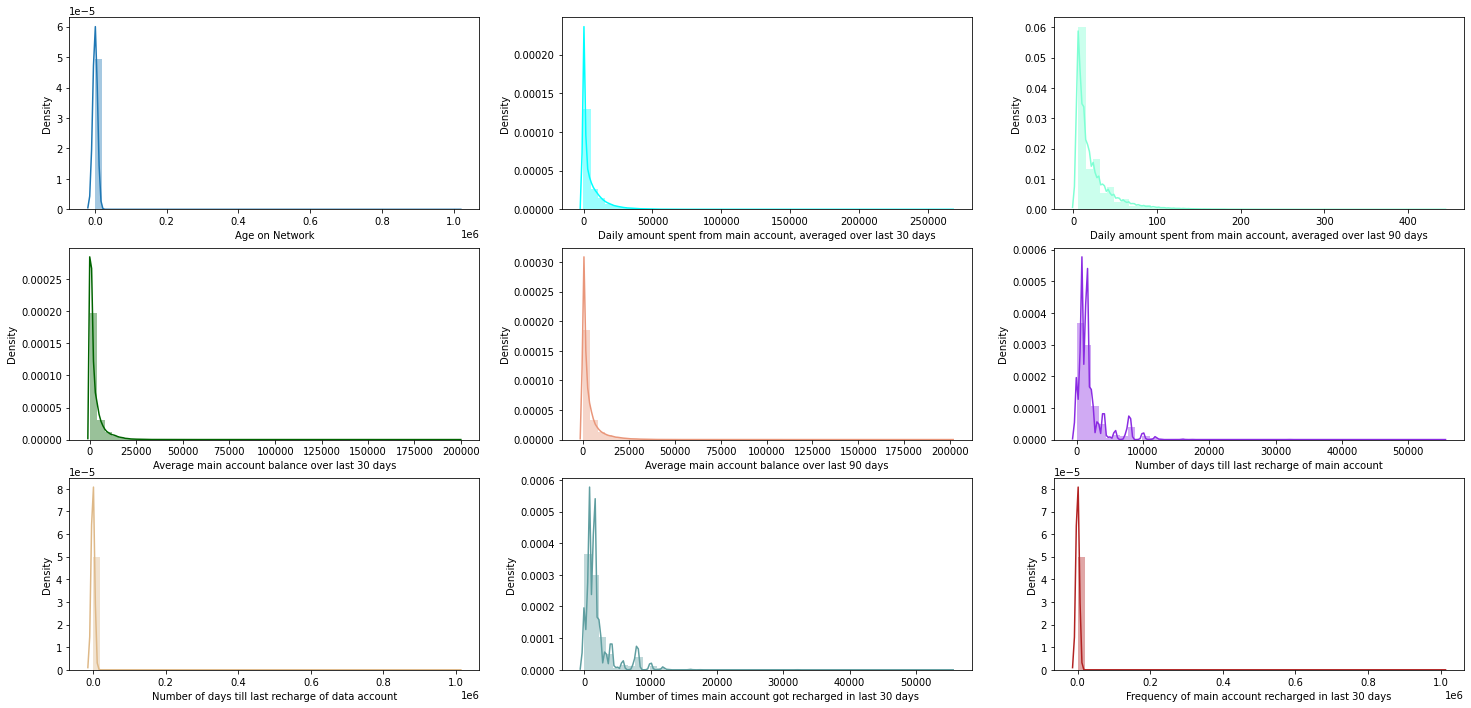

In [59]:
# checking the distribution of columns
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=plt.subplots(nrows=3,ncols=3,figsize=(25,12))

sns.distplot(data['aon'],ax=ax1,axlabel='Age on Network')
sns.distplot(data['daily_decr30'],ax=ax2,axlabel='Daily amount spent from main account, averaged over last 30 days',color='aqua')
sns.distplot(data['amnt_loans90'],ax=ax3,axlabel='Daily amount spent from main account, averaged over last 90 days',color='aquamarine')
sns.distplot(data['rental30'],ax=ax4,axlabel='Average main account balance over last 30 days',color='darkgreen')
sns.distplot(data['rental90'],ax=ax5,axlabel='Average main account balance over last 90 days',color='darksalmon')
sns.distplot(data['last_rech_date_ma'],ax=ax6,axlabel='Number of days till last recharge of main account',color='blueviolet')
sns.distplot(data['last_rech_date_da'],ax=ax7,axlabel='Number of days till last recharge of data account',color='burlywood')
sns.distplot(data['last_rech_amt_ma'],ax=ax8,axlabel='Number of times main account got recharged in last 30 days',color='cadetblue')
sns.distplot(data['fr_ma_rech30'],ax=ax9,axlabel='Frequency of main account recharged in last 30 days',color='firebrick')

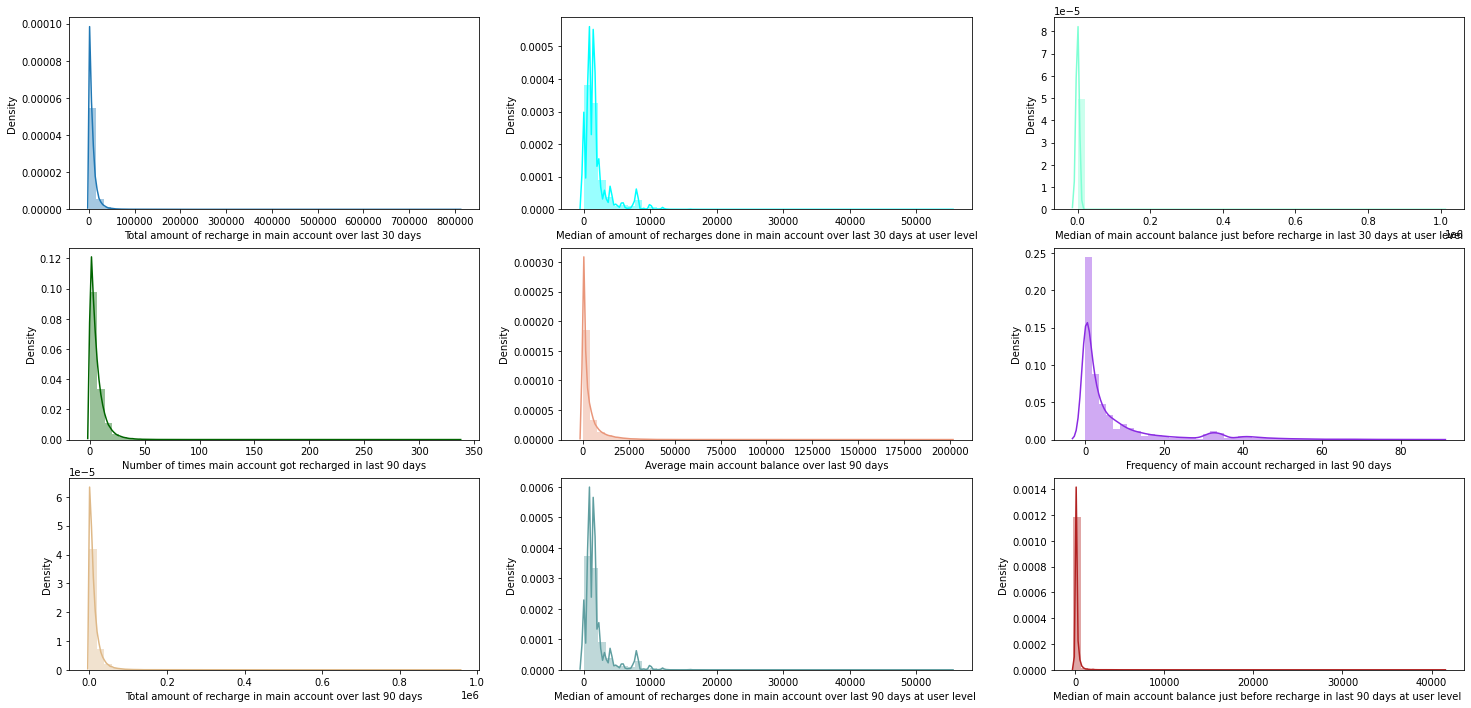

In [60]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=plt.subplots(nrows=3,ncols=3,figsize=(25,12))

sns.distplot(data['sumamnt_ma_rech30'],ax=ax1,axlabel='Total amount of recharge in main account over last 30 days ')
sns.distplot(data['medianamnt_ma_rech30'],ax=ax2,axlabel='Median of amount of recharges done in main account over last 30 days at user level',color='aqua')
sns.distplot(data['medianmarechprebal30'],ax=ax3,axlabel='Median of main account balance just before recharge in last 30 days at user level',color='aquamarine')
sns.distplot(data['cnt_ma_rech90'],ax=ax4,axlabel='Number of times main account got recharged in last 90 days',color='darkgreen')
sns.distplot(data['rental90'],ax=ax5,axlabel='Average main account balance over last 90 days',color='darksalmon')
sns.distplot(data['fr_ma_rech90'],ax=ax6,axlabel='Frequency of main account recharged in last 90 days',color='blueviolet')
sns.distplot(data['sumamnt_ma_rech90'],ax=ax7,axlabel='Total amount of recharge in main account over last 90 days',color='burlywood')
sns.distplot(data['medianamnt_ma_rech90'],ax=ax8,axlabel='Median of amount of recharges done in main account over last 90 days at user level ',color='cadetblue')
sns.distplot(data['medianmarechprebal90'],ax=ax9,axlabel='Median of main account balance just before recharge in last 90 days at user level ',color='firebrick')

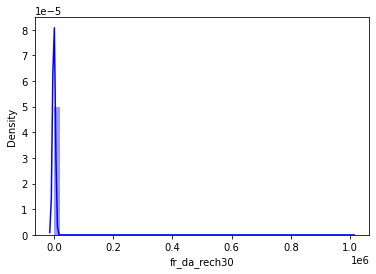

In [61]:
sns.distplot(data['fr_da_rech30'] , color='b',label='Frequency of data account recharged in last 30 days')

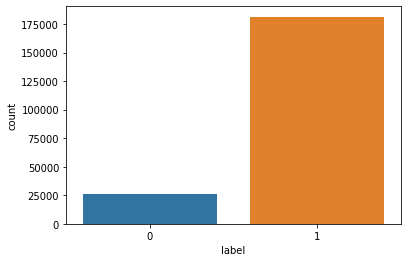

In [62]:
sns.countplot(data['label'])

 - There is less data for defaulters.

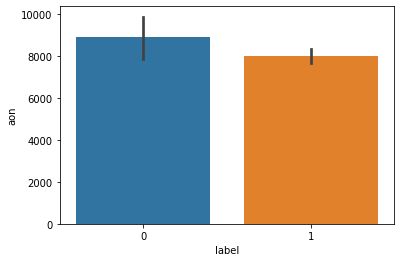

In [63]:
sns.barplot(x='label',y='aon',data=data)

 - With increase in Age on Network, defaulting rate is higher.

Text(0.5, 1.0, 'Daily Amount Reduced from Balance Over 30 days')

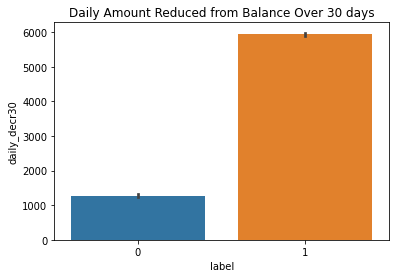

In [64]:
sns.barplot(x=data['label'],y=data['daily_decr30'])
plt.title('Daily Amount Reduced from Balance Over 30 days')

Text(0.5, 1.0, 'Average main account balance over last 30 days')

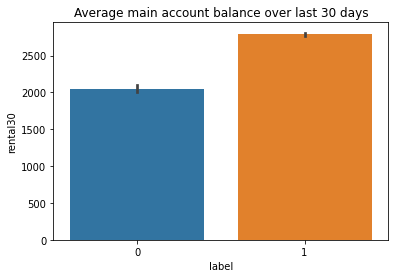

In [65]:
sns.barplot(x=data['label'],y=data['rental30'])
plt.title('Average main account balance over last 30 days')

There is huge imbalance in the data collected, 
when compared to the imbalances,we can note that there is less difference between loan default and repayment.
Hence can say that with the increase in Average Main balance,there is a probability of defaulting.

Defaulters have  max average balance of 2000,repayers has an avg main balance over 2500

Text(0.5, 1.0, 'No.of times main account got recharged in last 30 days')

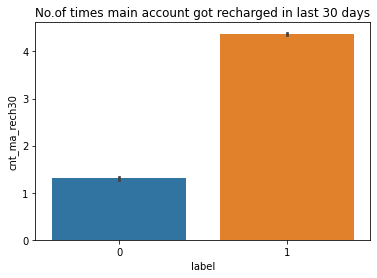

In [66]:
sns.barplot(x=data['label'],y=data['cnt_ma_rech30'])
plt.title('No.of times main account got recharged in last 30 days')

Defaulters recharged Main account max number between 1 and 2 times.

whereas repayers recharged for 4 plus times.

Text(0.5, 1.0, 'Frequency of main account recharged in last 30 days')

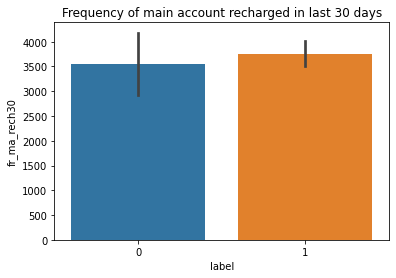

In [67]:
sns.barplot(x=data['label'],y=data['fr_ma_rech30'])
plt.title('Frequency of main account recharged in last 30 days')

With increase in frequency of Recharge in last 30 days,equal probabilities of defaulting and repayment.
Even though there is less data about defaulting,there is high chance of defaulting with incresed recharge fdrequency.

Text(0.5, 1.0, 'Total amount of recharge in main account over last 30 days')

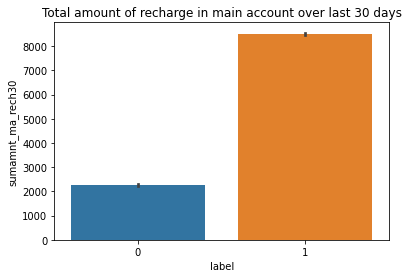

In [68]:
sns.barplot(x=data['label'],y=data['sumamnt_ma_rech30'])
plt.title('Total amount of recharge in main account over last 30 days')

the defaulters has max limit ranging between 2000 and 3000 of Total recharge amount.

Text(0.5, 1.0, 'Median of recharge  done in main account over last 30 days')

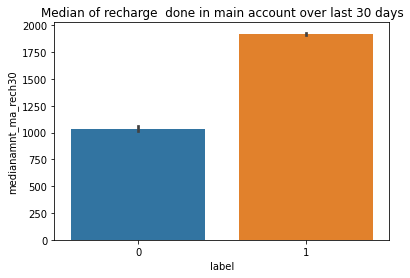

In [69]:
sns.barplot(x=data['label'],y=data['medianamnt_ma_rech30'])
plt.title('Median of recharge  done in main account over last 30 days')

On an average the defaulters has recharged for a max of 1000 indonesian rupaiah.

Text(0.5, 1.0, 'Median of Main balance before recharge in last 30 days')

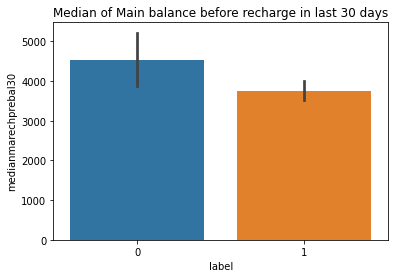

In [70]:
sns.barplot(x=data['label'],y=data['medianmarechprebal30'])
plt.title('Median of Main balance before recharge in last 30 days')

Defaulters has a medianMain account recharge amount ranging between 4000 and 5000.

2)With increase in Median of Main balance recharge,probability of defaulting is very high.

Text(0.5, 1.0, 'No.of times data account got recharged in last 30 days')

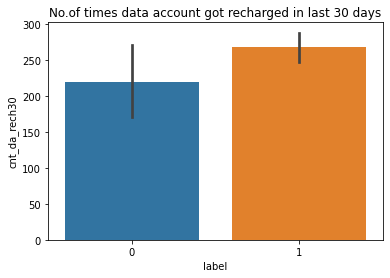

In [71]:
sns.barplot(x=data['label'],y=data['cnt_da_rech30'])
plt.title('No.of times data account got recharged in last 30 days')

1)Defaulters has recharged the data account for a maximum of 200 to 250 times.

2)With increase in No.of times data accounts recharge,probability of defaulting is high.

Text(0.5, 1.0, 'Frequency of data account recharged in last 30 days')

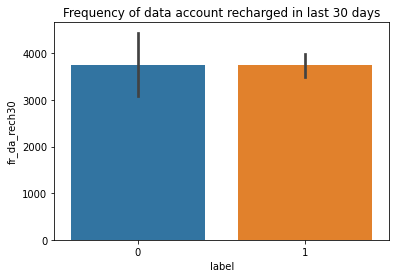

In [72]:
sns.barplot(x=data['label'],y=data['fr_da_rech30'])
plt.title('Frequency of data account recharged in last 30 days')

1)with increase in frequency of recharging  data account,higher  chances of defulting.

Text(0.5, 1.0, 'Number of loans taken by user in last 30 days')

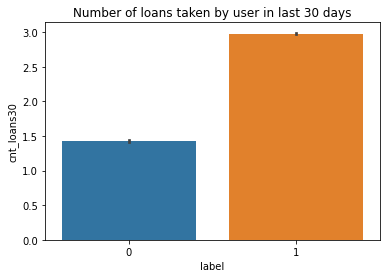

In [73]:
sns.barplot(x=data['label'],y=data['cnt_loans30'])
plt.title('Number of loans taken by user in last 30 days')

1)Defaulters has taken between 1 to 1.5 no.of loans.
As practically there will be no 1.5 loan,considering only 1 loan.

2)Those who repaid had taken maxof 3 loans.

Text(0.5, 1.0, 'Total amount of loans taken by user in last 30 days')

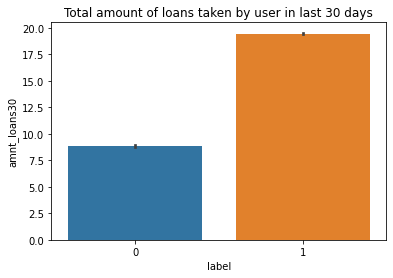

In [74]:
sns.barplot(x=data['label'],y=data['amnt_loans30'])
plt.title('Total amount of loans taken by user in last 30 days')

1)Total Amount of loans took by Defaulters varies between 7.5 and 10.

2)Repayers has took 20 loans which tends to be the max limit.

Text(0.5, 1.0, 'Maximum Amount of loan taken by user in last 30 days')

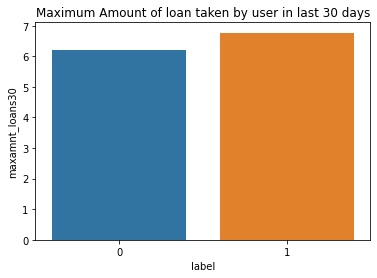

In [75]:
sns.barplot(x=data['label'],y=data['maxamnt_loans30'])
plt.title('Maximum Amount of loan taken by user in last 30 days')

A user can take Maximum  of 7 loans in 30 days.

Defaulters took 6 loans whereas repayers took 7 loans. 

Can say that there not a much difference in loans took by both defaulters and repayers.

Text(0.5, 1.0, 'Median of loan amount took by user in last 30 days')

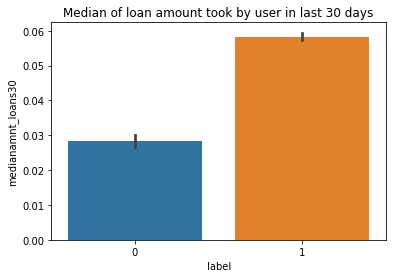

In [76]:
sns.barplot(x=data['label'],y=data['medianamnt_loans30'])
plt.title('Median of loan amount took by user in last 30 days')

Median of loan Amount by defaulters is 0.03 where as repayers took max of median amount which is 0.06

Text(0.5, 1.0, 'Average payback time in days over last 30 days')

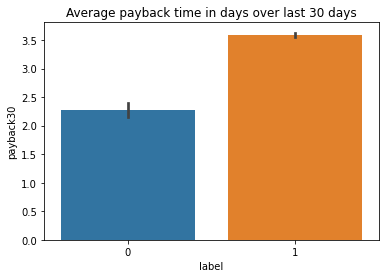

In [77]:
sns.barplot(x=data['label'],y=data['payback30'])
plt.title('Average payback time in days over last 30 days')

A potentail defaulter might repay in 2 days.

Repayers took average of 3.5 days.

# **90 DAYS DATA**

Text(0.5, 1.0, 'Daily amount spent from main account, averaged over last 90 days ')

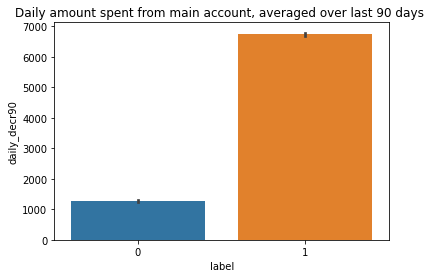

In [78]:
sns.barplot(x=data['label'],y=data['daily_decr90'])
plt.title('Daily amount spent from main account, averaged over last 90 days ')

 In terms of daily spending from main account in span of 90 days,<br>
1)the defaulters has spent a little above 1000

2)Repayers has spent 7000 rupaiah.

Text(0.5, 1.0, 'Average main account balance over last 90 days')

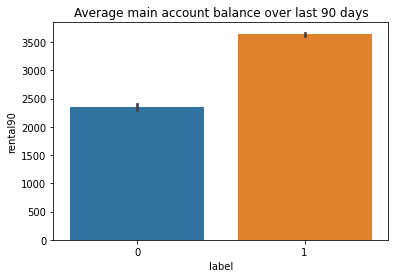

In [79]:
sns.barplot(x=data['label'],y=data['rental90'])
plt.title('Average main account balance over last 90 days')

1)Defaullters average=2000 to 2500

2)Repayers average= 3500

Text(0.5, 1.0, 'Number of times main account got recharged in last 90 days')

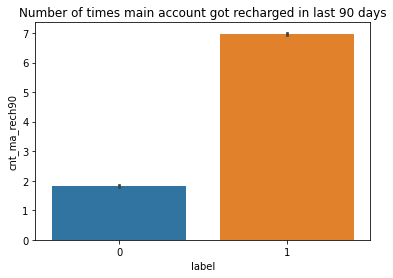

In [80]:
sns.barplot(x=data['label'],y=data['cnt_ma_rech90'])
plt.title('Number of times main account got recharged in last 90 days')

In terms of No.of times Main accounts recharged in 90 days,

defaulters recharged for 2 times.

repayers recharged for 7 times.

Text(0.5, 1.0, 'Frequency of main account recharged in last 90 days')

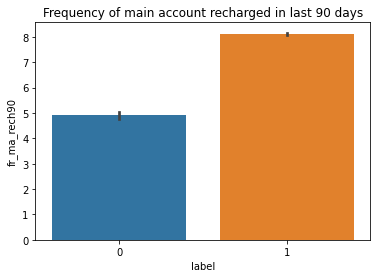

In [81]:
sns.barplot(x=data['label'],y=data['fr_ma_rech90'])
plt.title('Frequency of main account recharged in last 90 days')

In terms of Frequency of Main Account recharge in 90 days period,

defaulters frequency is 5.

repayers frequency is 8.

Text(0.5, 1.0, 'Total amount of recharge in main account over last 90 days')

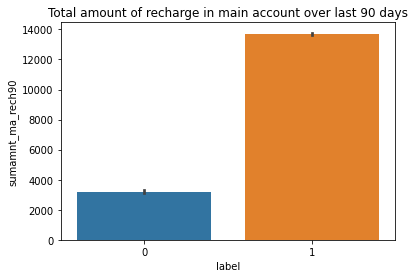

In [82]:
sns.barplot(x=data['label'],y=data['sumamnt_ma_rech90'])
plt.title('Total amount of recharge in main account over last 90 days')

In terms of Total recharge amount in 90 days,

defaulters recharge amount varies from 2000 to 4000.
 Repayers recharged for 14000.

Text(0.5, 1.0, 'Median Amount of recharge done in main account over last 90 days')

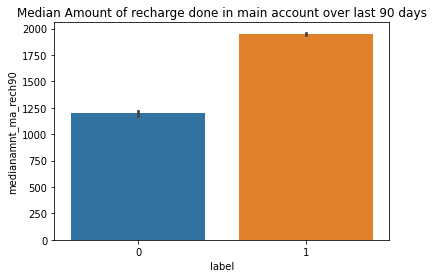

In [83]:
sns.barplot(x=data['label'],y=data['medianamnt_ma_rech90'])
plt.title('Median Amount of recharge done in main account over last 90 days')

In terms of  Recharge amount median,

defaulters median-1250

repayers median -2000

Text(0.5, 1.0, 'Number of times data account got recharged in last 90 days')

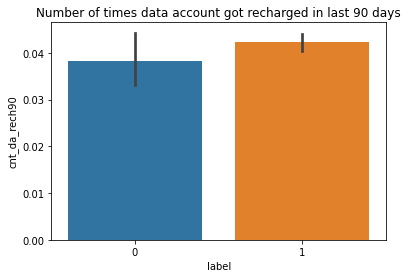

In [84]:
sns.barplot(x=data['label'],y=data['cnt_da_rech90'])
plt.title('Number of times data account got recharged in last 90 days')

In terms of No.of times data account recharged,

both defaulters and repayers has approximately equal no.of recharges.

Text(0.5, 1.0, 'Frequency of data account recharged in last 90 days')

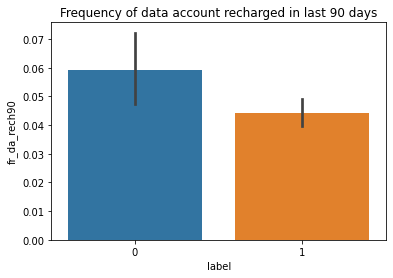

In [85]:
sns.barplot(x=data['label'],y=data['fr_da_rech90'])
plt.title('Frequency of data account recharged in last 90 days')

With increase in frequency of Data account recharge in 90 days,defaulting rate is high.

Text(0.5, 1.0, 'Number of loans taken by user in last 90 days')

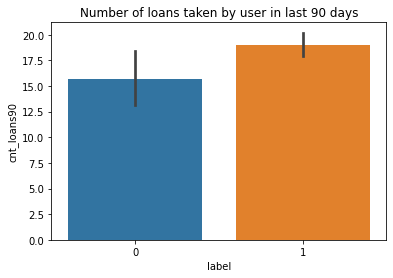

In [86]:
sns.barplot(x=data['label'],y=data['cnt_loans90'])
plt.title('Number of loans taken by user in last 90 days')

1)Defaulters took max of 15 loans

2)Repayers took max of 20 loans.

Text(0.5, 1.0, 'Total amount of loans taken by user in last 90 days')

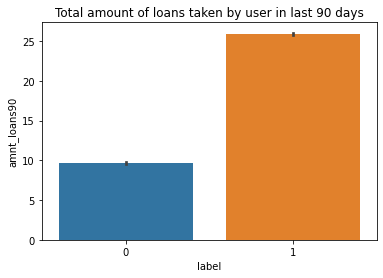

In [87]:
sns.barplot(x=data['label'],y=data['amnt_loans90'])
plt.title('Total amount of loans taken by user in last 90 days')

In total amount of loans users took,

1)defaulters took max of 10 loans.

2)Repayers took 25 max of loans.

Text(0.5, 1.0, 'maximum amount of loan taken by user in 90 days')

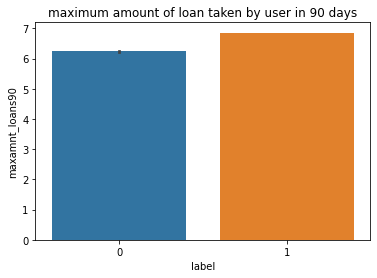

In [88]:
sns.barplot(x=data['label'],y=data['maxamnt_loans90'])
plt.title('maximum amount of loan taken by user in 90 days')

In terms of maximum loan amount,both defaulters and repayers max limit is approximately same.

Text(0.5, 1.0, 'Median of loan amount  took by the user in last 90 days')

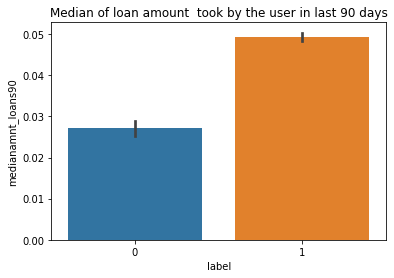

In [89]:
sns.barplot(x=data['label'],y=data['medianamnt_loans90'])
plt.title('Median of loan amount  took by the user in last 90 days')

1)Defaulters took max. median of 0.03 loan amount

2)Repayers took max. median of 0.05 loan amount

Text(0.5, 1.0, 'Average payback time in days over last 90 days')

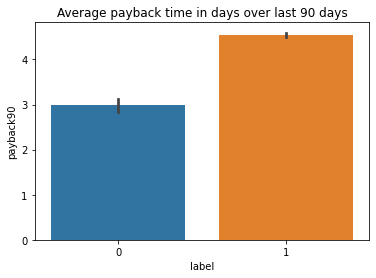

In [90]:
sns.barplot(x=data['label'],y=data['payback90'])
plt.title('Average payback time in days over last 90 days')

Average pay back time of potential defaulter in 90 days is 3 days.

Average pay back time of repayer in 90 days is greater than 4 days.

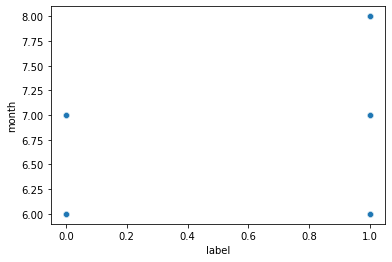

In [91]:
sns.scatterplot(x=data['label'],y=data['month'])

# **Checking for Outliers**

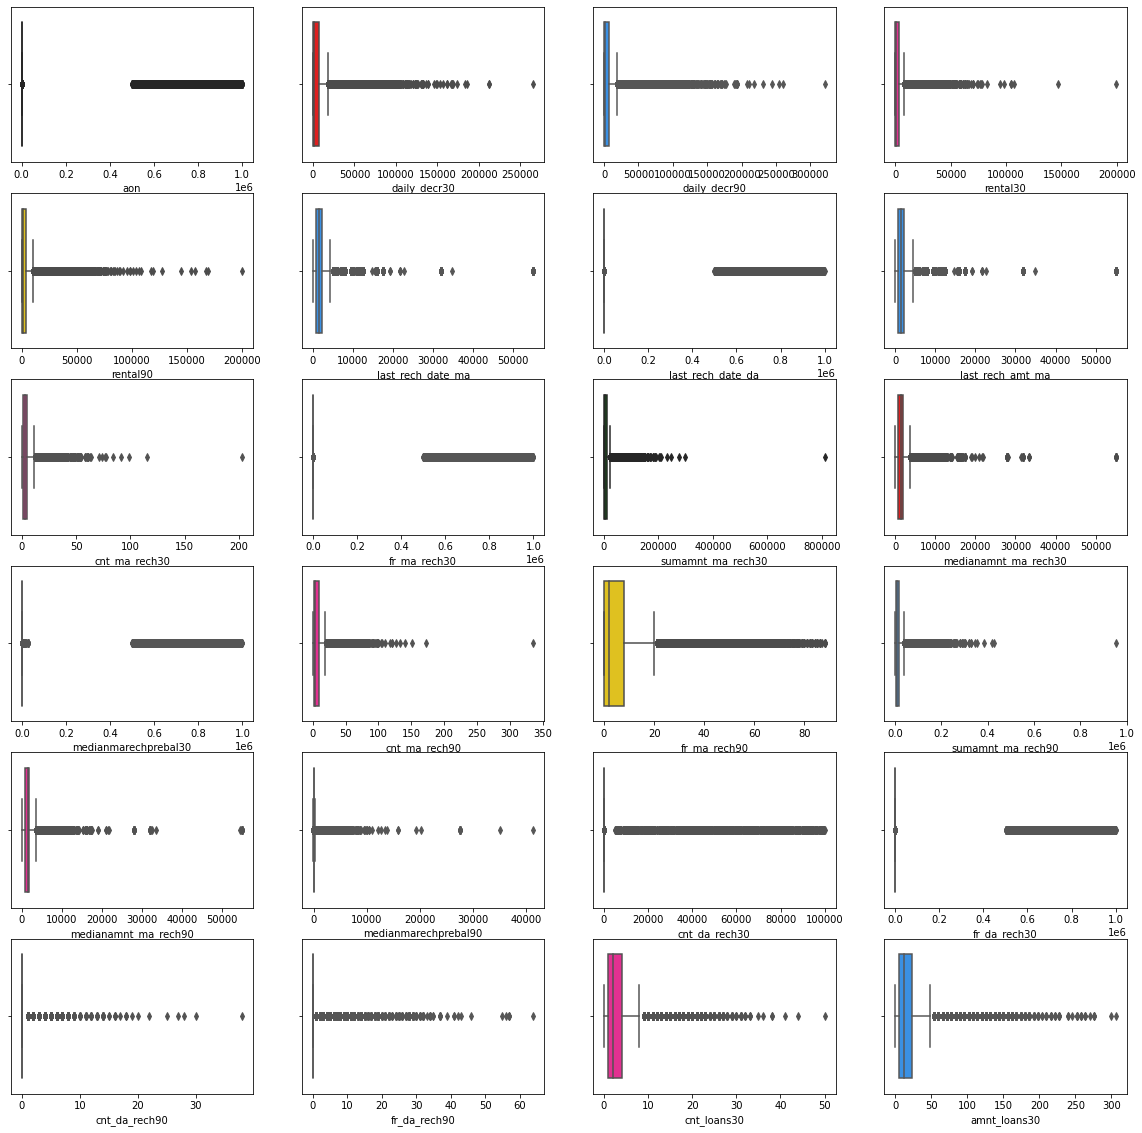

In [92]:
#checking outliers in columns
fig, ((ax1, ax2,ax3,ax4),(ax5,ax6,ax7, ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20),(ax21,ax22,ax23,ax24)) = plt.subplots(nrows=6, ncols=4, figsize = (20, 20))


sns.boxplot(data['aon'] , color="g",ax=ax1)
sns.boxplot(data['daily_decr30'] , color="r",ax=ax2)
sns.boxplot(data['daily_decr90'] , color="dodgerblue",ax=ax3)
sns.boxplot(data['rental30'] , color="deeppink",ax=ax4)
sns.boxplot(data['rental90'] , color="gold",ax=ax5)
sns.boxplot(data['last_rech_date_ma'] , color="dodgerblue",ax=ax6)
sns.boxplot(data['last_rech_date_da'] , color="deeppink",ax=ax7)
sns.boxplot(data['last_rech_amt_ma'] , color="dodgerblue",ax=ax8)
sns.boxplot(data['cnt_ma_rech30'] , color="deeppink",ax=ax9)
sns.boxplot(data['fr_ma_rech30'] , color="dodgerblue",ax=ax10)
sns.boxplot(data['sumamnt_ma_rech30'] , color="g",ax=ax11)
sns.boxplot(data['medianamnt_ma_rech30'] , color="r",ax=ax12)
sns.boxplot(data['medianmarechprebal30'] , color="dodgerblue",ax=ax13)
sns.boxplot(data['cnt_ma_rech90'] , color="deeppink",ax=ax14)
sns.boxplot(data['fr_ma_rech90'] , color="gold",ax=ax15)
sns.boxplot(data['sumamnt_ma_rech90'] , color="dodgerblue",ax=ax16)
sns.boxplot(data['medianamnt_ma_rech90'] , color="deeppink",ax=ax17)
sns.boxplot(data['medianmarechprebal90'] , color="dodgerblue",ax=ax18)
sns.boxplot(data['cnt_da_rech30'] , color="deeppink",ax=ax19)
sns.boxplot(data['fr_da_rech30'] , color="dodgerblue",ax=ax20)
sns.boxplot(data['cnt_da_rech90'] , color="deeppink",ax=ax21)
sns.boxplot(data['fr_da_rech90'] , color="dodgerblue",ax=ax22)
sns.boxplot(data['cnt_loans30'] , color="deeppink",ax=ax23)
sns.boxplot(data['amnt_loans30'] , color="dodgerblue",ax=ax24)

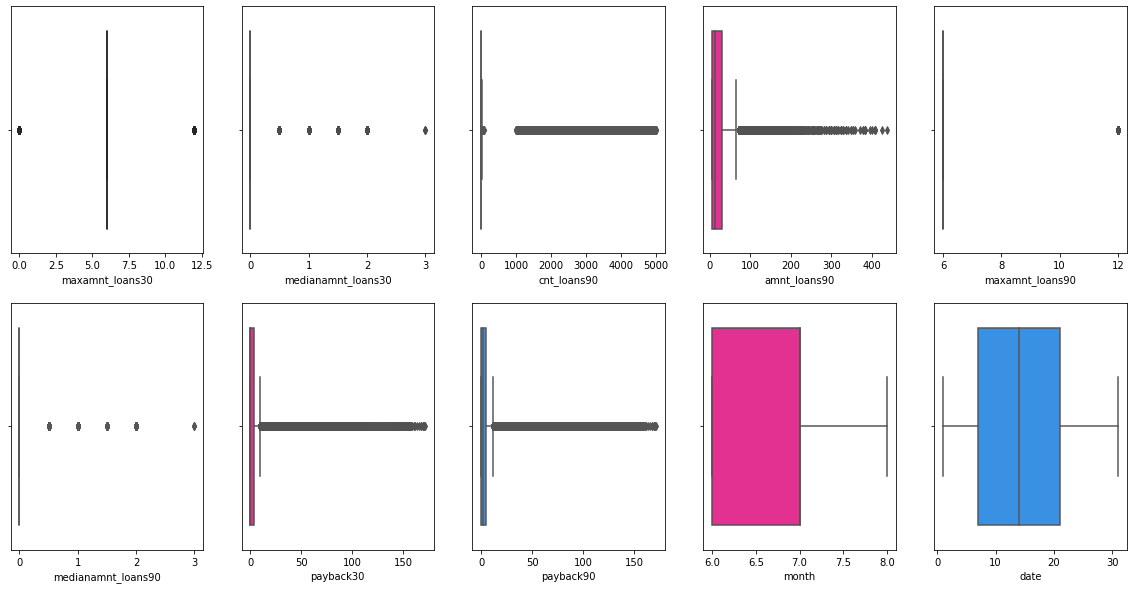

In [93]:
fig, ((ax1, ax2,ax3,ax4,ax5),(ax6,ax7, ax8,ax9,ax10)) = plt.subplots(nrows=2, ncols=5, figsize = (20, 10))


sns.boxplot(data['maxamnt_loans30'] , color="g",ax=ax1)
sns.boxplot(data['medianamnt_loans30'] , color="r",ax=ax2)
sns.boxplot(data['cnt_loans90'] , color="dodgerblue",ax=ax3)
sns.boxplot(data['amnt_loans90'] , color="deeppink",ax=ax4)
sns.boxplot(data['maxamnt_loans90'] , color="gold",ax=ax5)
sns.boxplot(data['medianamnt_loans90'] , color="dodgerblue",ax=ax6)
sns.boxplot(data['payback30'] , color="deeppink",ax=ax7)
sns.boxplot(data['payback90'] , color="dodgerblue",ax=ax8)
sns.boxplot(data['month'] , color="deeppink",ax=ax9)
sns.boxplot(data['date'] , color="dodgerblue",ax=ax10)

**OBSERVATION:**
We can note that except month and date column, outliers are present in almost every column.<br>
# **EDA CONCLUSION:**<br>
1) We can note that there is less data about defaulters and more about those who did repay their loan. Hence can say that the data is imbalanced.<br>
2) With increase in Age on Network, defaulting rate is higher.
The data is collected based on different parameters for two time periods. One observation is for 30 days and other is for 90 days. Analyzing the parameters separately.<br>
For 30 days:<br>
Average main account balance over last 30 days: There is huge imbalance in the data collected,when compared to the imbalances, we can note that there is less difference between loan default and repayment. Hence can say that with the increase in Average Main balance,there is a probability of defaulting.<br>
No.of times main account got recharged in last 30 days: Defaulters recharged Main account max number between 1 and 2 times.whereas repayers recharged for 4 plus times.<br>
Frequency of main account recharged in last 30 days: With increase in frequency of Recharge in last 30 days, equal probabilities of defaulting and repayment. Even though there is less data about defaulting, there is high chance of defaulting with increased recharge frequency.<br>
Total amount of recharge in main account over last 30 days: The defaulters has max limit ranging between 2000 and 3000 of Total recharge amount.<br>
Median of recharge done in main account over last 30 days: On an average the defaulters has recharged for a max of 1000 indonesian rupaiah.<br>
Median of Main balance before recharge in last 30 days: Defaulters has a Main account recharge median amount ranging between 4000 and 5000. With increase in Median of Main balance recharge, probability of defaulting is very high.<br>
No.of times data account got recharged: Defaulters has recharged the data account for a maximum of 200 to 250 times. With increase in No.of times data accounts recharge, probability of defaulting is high.<br>
Frequency of data account recharged: with increase in frequency of recharging data account, higher chances of defaulting.<br>
Number of loans taken by user: 1) Defaulters has taken between 1 to 1.5 no.of loans. As practically there will be no 1.5 loan, considering only 1 loan. 2) Those who repaid had taken max of 3 loans.<br>
Total amount of loans taken by user: 1)Total Amount of loans took by Defaulters varies between 7.5 and 10<br>
2)Repayers has took 20 loans which tends to be the max limit.<br>
Maximum Amount of loan taken by user: A user can take Maximum of 7 loans in 30 days.Defaulters took 6 loans whereas repayers took 7 loans. Can say that there not a much difference in loans took by both defaulters and repayers<br>.
Median of loan amount took by user: Median of loan Amount by defaulters is 0.03 where as repayers took max of median amount which is 0.06<br>
Average payback time in days over last 30 days: A potentail defaulter might repay in 2 days. Repayers took average of 3.5 days.<br>
BASED ON 90 DAYS:<br>
Daily amount spent from main account: In terms of daily spending from main account in span of 90 days, 1)the defaulters has spent a little above 1000 2)Repayers has spent 7000 rupaiah.<br>
Average main account balance: In terms of Average balance over 90 days, 1)Defaullters average=2000 to 2500 2)Repayers average= 3500
Number of times main account got recharged: In terms of No.of times Main accounts recharged in 90 days, defaulters recharged for 2 times. Re-payers recharged for 7 times.<br>
Frequency of main account recharge: In terms of Frequency of Main Account recharge in 90 days period, defaulters frequency is 5, Re-payers frequency is 8.
Total amount of recharge in main account: In terms of Total recharge amount in 90 days ,defaulters recharge amount varies from 2000 to 4000. Repayers recharged for 14000. In terms of Recharge amount median,defaulters median-1250,repayers median -2000 In terms of No.of times data account recharged, both defaulters and repayers has approximately equal no.of recharges.
Frequency of data account recharge: With increase in frequency of Data account recharge in 90 days,defaulting rate is high.<br>
Number of loans taken by user: 1)Defaulters took max of 15 loans 2)Repayers took max of 20 loans.<br>
In total amount of loans users took, 1)defaulters took max of 10 loans. 2)Repayers took 25 max of loans.<br>
In terms of maximum loan amount,both defaulters and repayers max limit is approximately same.<br>
Median of loan amount took by the user: <br>
1)Defaulters took max. median of 0.03 loan amount 2)Repayers took max. median of 0.05 loan amount
Average pay back time of potential defaulter in 90 days is 3 days. Average pay back time of repayer in 90 days is greater than 4 days.

In [94]:
for col in data.columns:
        
        print("No.of unique values in ",col,"::",data[col].nunique())

No.of unique values in  label :: 2
No.of unique values in  msisdn :: 184235
No.of unique values in  aon :: 4473
No.of unique values in  daily_decr30 :: 146585
No.of unique values in  daily_decr90 :: 157216
No.of unique values in  rental30 :: 129042
No.of unique values in  rental90 :: 137314
No.of unique values in  last_rech_date_ma :: 69
No.of unique values in  last_rech_date_da :: 1155
No.of unique values in  last_rech_amt_ma :: 69
No.of unique values in  cnt_ma_rech30 :: 71
No.of unique values in  fr_ma_rech30 :: 1069
No.of unique values in  sumamnt_ma_rech30 :: 15112
No.of unique values in  medianamnt_ma_rech30 :: 509
No.of unique values in  medianmarechprebal30 :: 30205
No.of unique values in  cnt_ma_rech90 :: 110
No.of unique values in  fr_ma_rech90 :: 89
No.of unique values in  sumamnt_ma_rech90 :: 31624
No.of unique values in  medianamnt_ma_rech90 :: 607
No.of unique values in  medianmarechprebal90 :: 29537
No.of unique values in  cnt_da_rech30 :: 1056
No.of unique values in  fr

# **Plotting Correlation**

In [95]:
#msisdn is nothing but phone number of the user,it has nothing to do with the predictions of loan payment
#so dropping the msisdn column
data.drop(['msisdn'],axis=1,inplace=True)

In [96]:
data_Cor=data.corr()
data_Cor['label']

label                   1.000000
aon                    -0.003900
daily_decr30            0.168267
daily_decr90            0.166020
rental30                0.057860
rental90                0.075098
last_rech_date_ma       0.131744
last_rech_date_da       0.001772
last_rech_amt_ma        0.131744
cnt_ma_rech30           0.239399
fr_ma_rech30            0.001274
sumamnt_ma_rech30       0.204252
medianamnt_ma_rech30    0.142047
medianmarechprebal30   -0.004820
cnt_ma_rech90           0.237831
fr_ma_rech90            0.084565
sumamnt_ma_rech90       0.206712
medianamnt_ma_rech90    0.120616
medianmarechprebal90    0.040006
cnt_da_rech30           0.003832
fr_da_rech30           -0.000075
cnt_da_rech90           0.003253
fr_da_rech90           -0.005243
cnt_loans30             0.201600
amnt_loans30            0.202318
maxamnt_loans30         0.087468
medianamnt_loans30      0.045556
cnt_loans90             0.004902
amnt_loans90            0.204055
maxamnt_loans90         0.101247
medianamnt

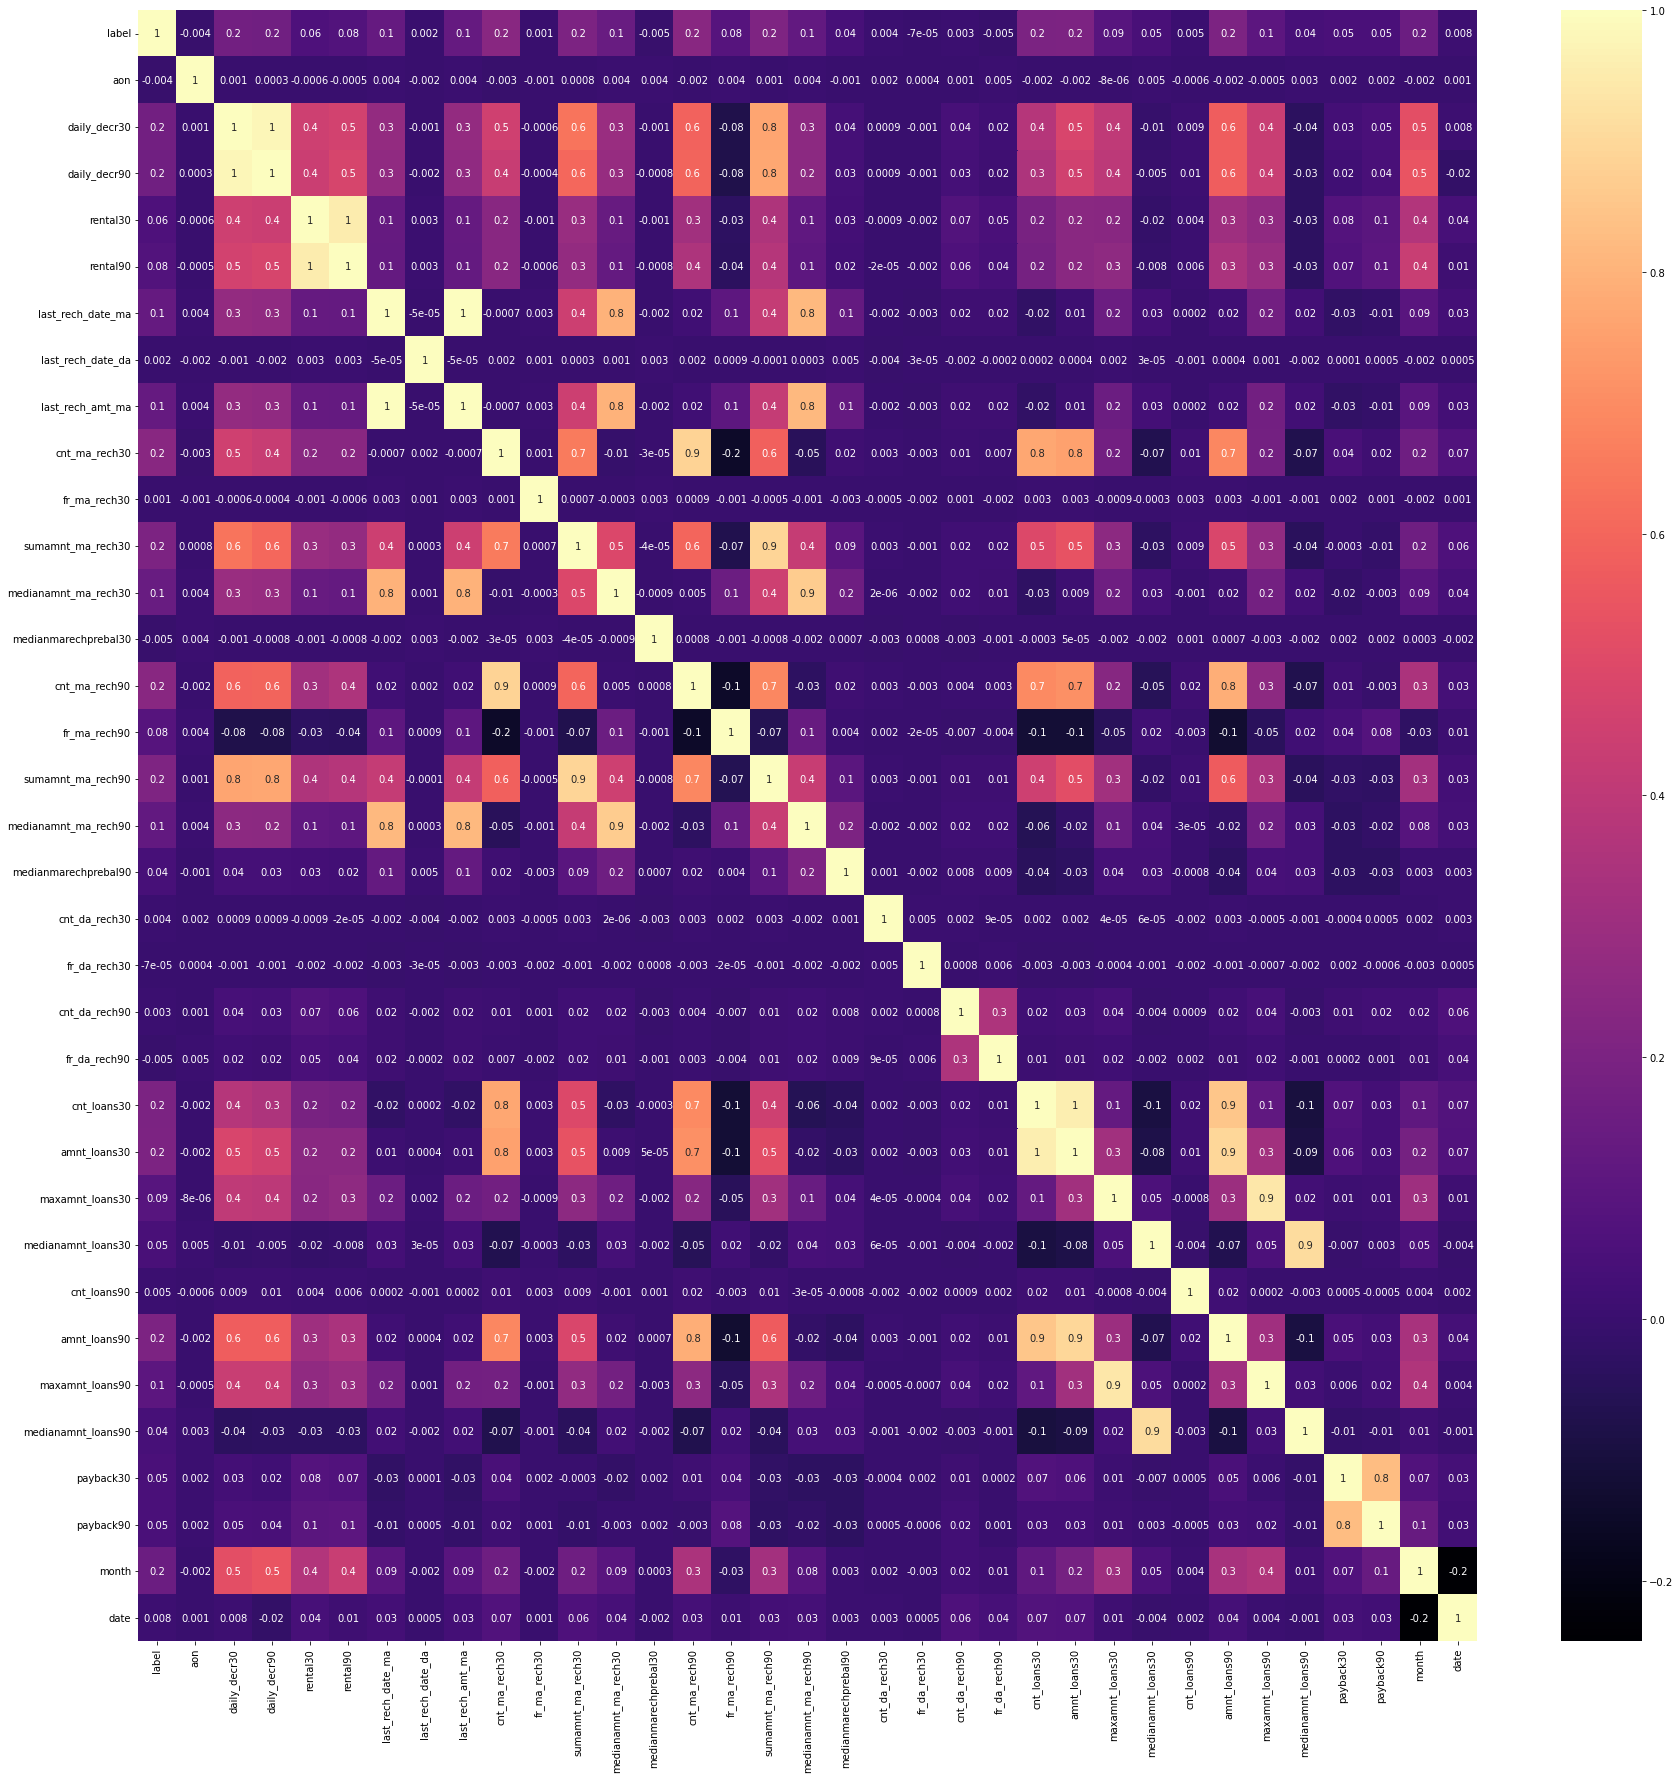

In [97]:
plt.figure(figsize=(30,30))
sns.heatmap(data_Cor,cmap='magma',annot=True,fmt='.1g')

# **Outliers Removal**

In [98]:
data.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'month', 'date'],
      dtype='object')

In [99]:
data.shape

(207550, 35)

In [100]:
cols=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
for i in cols:
            FloorQ=data[i].quantile(0.10)
            CeilQ=data[i].quantile(0.90)
            data[i] = np.where(data[i] <FloorQ,FloorQ,data[i])
            data[i] = np.where(data[i] >CeilQ,CeilQ,data[i])
            print(i,"->",data[i].skew())

aon -> 0.5284793206435929
daily_decr30 -> 1.0935453721579609
daily_decr90 -> 1.1543224310681035
rental30 -> 1.1265741276622285
rental90 -> 1.1558700165194147
last_rech_date_ma -> 0.8359061321231329
last_rech_date_da -> 0
last_rech_amt_ma -> 0.8359061321231329
cnt_ma_rech30 -> 0.6277453849914029
fr_ma_rech30 -> 1.0070623988221368
sumamnt_ma_rech30 -> 0.7588124242088926
medianamnt_ma_rech30 -> 0.9295986608192282
medianmarechprebal30 -> 1.3584623130969407
cnt_ma_rech90 -> 0.7670588467394291
fr_ma_rech90 -> 1.5893409860791652
sumamnt_ma_rech90 -> 0.8543081510966238
medianamnt_ma_rech90 -> 0.9684104269012621
medianmarechprebal90 -> 1.258477107838736
cnt_da_rech30 -> 0
fr_da_rech30 -> 0
cnt_da_rech90 -> 0
fr_da_rech90 -> 0
cnt_loans30 -> 0.8910588387118499
amnt_loans30 -> 0.7816448336192705
maxamnt_loans30 -> 2.2568424305116785
medianamnt_loans30 -> 0
cnt_loans90 -> 1.017641178749645
amnt_loans90 -> 0.9564054554835316
maxamnt_loans90 -> 2.224470801656892
medianamnt_loans90 -> 0
payback30 -> 

In [101]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
count,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.0,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.0,207550.0,207550.0,207550.0,207550.000000,207550.000000,207550.000000,207550.0,207550.000000,207550.000000,207550.000000,207550.0,207550.000000,207550.000000,207550.000000,207550.000000
mean,0.873948,637.677639,4224.630321,4664.158439,2148.837527,2720.963114,1660.528861,0.0,1660.528861,3.537909,3.447511,6490.703558,1520.673423,63.881006,5.550036,6.674710,10298.744765,1560.089795,59.213304,0.0,0.0,0.0,0.0,2.522664,15.918343,6.754777,0.0,3.331279,20.643180,6.769116,0.0,2.199570,2.804969,6.787560,14.429159
std,0.331908,433.902329,5369.966356,6076.149249,2379.411441,3081.028838,1231.349189,0.0,1231.349189,2.876785,4.093413,5786.870078,1173.214946,74.263758,4.745016,9.540393,9539.944745,1152.484194,62.550068,0.0,0.0,0.0,0.0,1.720392,10.651435,1.989722,0.0,2.672582,16.275252,2.005785,0.0,2.768133,3.382969,0.737225,8.421331
min,0.000000,132.000000,8.674800,8.783167,66.929000,74.300000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.000000,6.000000,0.0,1.000000,6.000000,6.000000,0.0,0.000000,0.000000,6.000000,1.000000
25%,1.000000,246.000000,41.760000,41.979500,299.690000,326.340000,770.000000,0.0,770.000000,1.000000,0.000000,1543.000000,770.000000,11.000000,2.000000,0.000000,2317.000000,773.000000,14.600000,0.0,0.0,0.0,0.0,1.000000,6.000000,6.000000,0.0,1.000000,6.000000,6.000000,0.0,0.000000,0.000000,6.000000,7.000000
50%,1.000000,527.000000,1414.400000,1443.355000,1088.165000,1332.425000,1539.000000,0.0,1539.000000,3.000000,2.000000,4629.000000,1539.000000,33.930000,4.000000,2.000000,7218.000000,1539.000000,36.000000,0.0,0.0,0.0,0.0,2.000000,12.000000,6.000000,0.0,2.000000,12.000000,6.000000,0.0,0.000000,1.714286,7.000000,14.000000
75%,1.000000,982.000000,7200.000000,7723.997500,3334.750000,4167.762500,2309.000000,0.0,2309.000000,5.000000,6.000000,10013.000000,1924.000000,83.000000,9.000000,8.000000,16000.000000,1924.000000,79.000000,0.0,0.0,0.0,0.0,4.000000,24.000000,6.000000,0.0,5.000000,30.000000,6.000000,0.0,3.800000,4.500000,7.000000,21.000000
max,1.000000,1410.000000,15564.200000,17720.215000,7277.106000,9422.277000,4067.000000,0.0,4067.000000,9.000000,12.000000,17900.100000,4048.000000,236.000000,15.000000,30.000000,29582.000000,4048.000000,201.500000,0.0,0.0,0.0,0.0,6.000000,36.000000,12.000000,0.0,9.000000,54.000000,12.000000,0.0,8.000000,10.000000,8.000000,31.000000


In [102]:
# split x & y
y = data['label']

In [103]:
x = data.drop(['label'],axis=1,inplace=True)

In [104]:
d1 = data.values.reshape(-1,1)

In [105]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 207550, dtype: int64

In [106]:
x = data

In [107]:
x.fillna(np.nan, inplace=True)

In [108]:
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
0,272.0,3055.050000,3065.150000,220.13,260.13,1539.0,0.0,1539.0,2.0,12.0,3078.0,1539.0,7.50,2.0,21.0,3078.0,1539.0,7.50,0.0,0.0,0.0,0.0,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,8.000000,10.000000,7,20
1,712.0,12122.000000,12124.750000,3691.26,3691.26,4067.0,0.0,4067.0,1.0,0.0,5787.0,4048.0,61.04,1.0,0.0,5787.0,4048.0,61.04,0.0,0.0,0.0,0.0,1.0,12.0,12.0,0.0,1.0,12.0,12.0,0.0,0.000000,0.000000,8,10
2,535.0,1398.000000,1398.000000,900.13,900.13,1539.0,0.0,1539.0,1.0,0.0,1539.0,1539.0,66.32,1.0,0.0,1539.0,1539.0,66.32,0.0,0.0,0.0,0.0,1.0,6.0,6.0,0.0,1.0,6.0,6.0,0.0,0.000000,0.000000,8,19
3,241.0,21.228000,21.228000,159.42,159.42,947.0,0.0,947.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,947.0,947.0,2.50,0.0,0.0,0.0,0.0,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,0.000000,0.000000,6,6
4,947.0,150.619333,150.619333,1098.90,1098.90,2309.0,0.0,2309.0,7.0,2.0,17900.1,2309.0,29.00,8.0,2.0,23496.0,2888.0,35.00,0.0,0.0,0.0,0.0,6.0,36.0,6.0,0.0,7.0,42.0,6.0,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,4048.0,0.0,4048.0,3.0,2.0,10404.0,3178.0,91.81,3.0,2.0,10404.0,3178.0,91.81,0.0,0.0,0.0,0.0,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,1.000000,1.000000,6,17
209589,1075.0,36.936000,36.936000,1728.36,1728.36,773.0,0.0,773.0,4.0,1.0,3092.0,773.0,161.30,6.0,2.0,4038.0,773.0,111.80,0.0,0.0,0.0,0.0,3.0,18.0,6.0,0.0,3.0,18.0,6.0,0.0,1.000000,1.000000,6,12
209590,1013.0,11843.111667,11904.350000,5861.83,8893.20,1539.0,0.0,1539.0,5.0,8.0,9334.0,1539.0,51.13,11.0,5.0,18592.0,1539.0,47.13,0.0,0.0,0.0,0.0,4.0,36.0,12.0,0.0,6.0,54.0,12.0,0.0,4.000000,3.833333,7,29
209591,1410.0,12488.228333,12574.370000,411.83,984.58,773.0,0.0,773.0,5.0,4.0,12154.0,773.0,164.00,6.0,4.0,17941.0,2410.5,100.00,0.0,0.0,0.0,0.0,2.0,18.0,12.0,0.0,3.0,24.0,12.0,0.0,0.000000,10.000000,7,25


In [109]:
x['month']

0         7
1         8
2         8
3         6
4         6
         ..
209588    6
209589    6
209590    7
209591    7
209592    7
Name: month, Length: 207550, dtype: int64

In [110]:
# scaling x values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [111]:
x.shape

(207550, 34)

In [112]:
y.shape

(207550,)

In [113]:
# skewness removal
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# **Imbalanced Learn**

In [114]:
from imblearn.under_sampling import RandomUnderSampler

UnderSample = RandomUnderSampler(sampling_strategy='majority')
x_us, y_us = UnderSample.fit_resample(x, y)

print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_us.shape)

original  Target dataset shape: (207550,)
Resample Target dataset shape (52324,)


In [115]:
print('original  Independent dataset shape:',x.shape)
print('Resample Independent dataset shape',x_us.shape)

original  Independent dataset shape: (207550, 34)
Resample Independent dataset shape (52324, 34)


In [116]:
from collections import Counter

In [117]:
print('target distribution before sampling : ',Counter(y))

target distribution before sampling :  Counter({1: 181388, 0: 26162})


In [118]:
print('target distribution before sampling : ',Counter(y_us))

target distribution before sampling :  Counter({0: 26162, 1: 26162})


We can note that before performing Random under sampling, the data is unevenly distributed.

there are 181388 records of repayers and 26162 record of defaulters.If we feed this data into the model, 
it may give biased prediction.

So,performed undersampling.After performing undersampling we can note that equal no.of records are fetched for both defauters and repayers.

# **Model Building**

In [119]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# **Split X and Y**

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x_us,y_us,test_size=0.33,random_state=456)

# **Using Under Sampling**
# **Logistic Regression**

In [121]:
lr = LogisticRegression()
lr_score = cross_val_score(lr,x_us,y_us,scoring='accuracy')
print('cross validation score for svm : ',np.mean(lr_score))

cross validation score for svm :  0.7704112879541679


In [122]:
lr.fit(x_train,y_train)
predicted_lr = lr.predict(x_test)
print('Accuracy Score : ',accuracy_score(y_test,predicted_lr))
print('Precision : ',precision_score(y_test,predicted_lr))
print('Recall : ',recall_score(y_test,predicted_lr))
print('F1 Score : ',f1_score(y_test,predicted_lr))
print('Training Accuracy : ',lr.score(x_train,y_train))
print('Test Accuracy : ',lr.score(x_test,y_test))

Accuracy Score :  0.7689233798575317
Precision :  0.7781257528306432
Recall :  0.7504646840148699
F1 Score :  0.7640449438202248
Training Accuracy :  0.7713723364805888
Test Accuracy :  0.7689233798575317


# **Decision Tree Classifier**

In [123]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_us,y_us,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.780674342609923


In [124]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_dtc))
print('Precision: ', precision_score(y_test, predicted_dtc))
print('Recall: ',recall_score(y_test, predicted_dtc))
print('F1 Score:',f1_score(y_test, predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

Accuracy score:: 0.7757572247640007
Precision:  0.7761838115232097
Recall:  0.773118029739777
F1 Score: 0.7746478873239436
Training accuracy:: 0.9986878512137376
Test accuracy:: 0.7757572247640007


# **KNeighbors Classifier**

In [125]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_us,y_us,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7815151823977112


In [126]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_knn))
print('Precision: ', precision_score(y_test, predicted_knn))
print('Recall: ',recall_score(y_test, predicted_knn))
print('F-measure:',f1_score(y_test, predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

Accuracy score:: 0.7806799096542538
Precision:  0.7947181807066879
Recall:  0.7551115241635687
F-measure: 0.7744087686900577
Training accuracy:: 0.8418860712553841
Test accuracy:: 0.7806799096542538


# **Rnadom Forest Classifier**

In [127]:
rfc = RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_us,y_us,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.838238662514191


In [128]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_rfc))
print('Precision: ', precision_score(y_test, predicted_knn))
print('Recall: ',recall_score(y_test, predicted_rfc))
print('F-measure:',f1_score(y_test, predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

Accuracy score:: 0.8339607343487577
Precision:  0.7947181807066879
Recall:  0.8466542750929368
F-measure: 0.8356360717766439
Training accuracy:: 0.9986878512137376
Test accuracy:: 0.8339607343487577


# **Ensemble Techniques**
# **Ada Boost Classifier**

In [129]:
adc = AdaBoostClassifier()
adc_score = cross_val_score(adc,x_us,y_us,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adc_score))

cross validation score for Ada boost: 0.812571682529887


In [130]:
adc.fit(x_train,y_train)
predicted_adc=adc.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_adc))
print("Training accuracy::",adc.score(x_train,y_train))
print("Test accuracy::",adc.score(x_test,y_test))

Accuracy score:: 0.8108530723345109
Training accuracy:: 0.817097869184471
Test accuracy:: 0.8108530723345109


In [131]:
print('Precision: ', precision_score(y_test, predicted_adc))
print('Recall: ',recall_score(y_test, predicted_adc))
print('F-measure:',f1_score(y_test, predicted_adc))

Precision:  0.8185830152671756
Recall:  0.7972815985130112
F-measure: 0.807791902071563


# **Bagging CLassifier**

In [132]:
from sklearn.ensemble import BaggingClassifier
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_us,y_us,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8290841327765281


In [133]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

Accuracy score:: 0.8265477500434355
Training accuracy:: 0.9872493367943634
Test accuracy:: 0.8265477500434355


# **Gradient Boosting Classifier**

In [134]:
grbc=BaggingClassifier()
grbc_score=cross_val_score(grbc,x_us,y_us,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(grbc_score))

cross validation score for BAGGING Classifier: 0.8293323991886353


In [135]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print("Accuracy score::",accuracy_score(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

Accuracy score:: 0.823478311229513
Training accuracy:: 0.9870211370054482
Test accuracy:: 0.823478311229513


Choosing Adaboost classifier because there both train and test accuracies are same.<br>
Rest of the two models there is huge difference between train and test accuracies so not considering them.

# **Hyper Parameter Tuning**

In [136]:
parameters={
    'n_estimators':[100,200],
    'learning_rate':[0.001,0.01,0.1,0.2,0.5],
    'algorithm':['SAMME', 'SAMME.R']
}

In [137]:
adb_grid=GridSearchCV(AdaBoostClassifier(),parameters,cv=10,scoring='accuracy')

In [138]:
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Accuracy after parameter tuning:: 0.8151387038860254


We can observe that accuracy score increased after tuning hyper Parameters

In [139]:
from sklearn.metrics import classification_report

In [140]:
print("CLASSIFICATION REORT::\n",classification_report(y_test, adb_pred))

CLASSIFICATION REORT::
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      8659
           1       0.82      0.81      0.81      8608

    accuracy                           0.82     17267
   macro avg       0.82      0.82      0.82     17267
weighted avg       0.82      0.82      0.82     17267



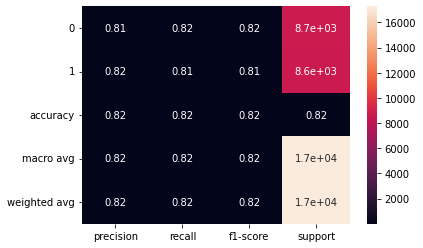

In [141]:
clsf_repo = classification_report(y_test,adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [142]:
from sklearn.metrics import roc_auc_score

In [143]:
print("roc auc score::",roc_auc_score(y_test, adb_pred))

roc auc score:: 0.8151131432323675


In [144]:
from sklearn.metrics import roc_curve

In [145]:
fpr1, tpr1, thresh1 = roc_curve(y_test, adb_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, predicted_dtc, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, predicted_rfc, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, predicted_knn, pos_label=1)

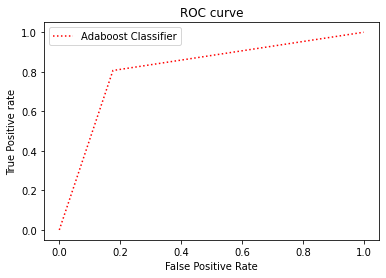

In [146]:
#plotting ROC CURVE

plt.plot(fpr1, tpr1, linestyle=':',color='red', label='Adaboost Classifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# **Saving Model**

In [147]:
import joblib

In [148]:
joblib.dump(adb_grid.best_estimator_,'MicroCreditDefaulterPrediction.obj')

['MicroCreditDefaulterPrediction.obj']